# H2HBABBA MILESTONE
## MILESTONE OF AI BASED PAYMENT DATE PREDICTION

In [1]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./H2HBABBA3010.csv')

In [3]:
#read a file using panda now we check the head and tail of dataset
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR llc,2019-06-05 00:00:00,2019.0,1.929379e+09,2019-05-26,20190525,20190526,20190610.0,USD,RV,1.0,NaN,32255.73,20190526.0,NAH4,1.929379e+09,0
1,U001,0200779051,AFFILI us,2019-06-10 00:00:00,2019.0,1.929394e+09,2019-05-28,20190528,20190528,20190612.0,USD,RV,1.0,NaN,95235.88,20190528.0,NAA8,1.929394e+09,0
2,U001,CCU013,KRAFT F foundation,2019-11-01 00:00:00,2019.0,1.929822e+09,2019-09-06,20190904,20190906,20190906.0,USD,RV,1.0,NaN,17.44,20190906.0,NAX2,1.929822e+09,0
3,CA02,0140104429,COSTCO foundation,NaN,2020.0,2.960627e+09,2020-04-05,20200406,20200405,20200417.0,CAD,RV,1.0,NaN,2545.09,20200407.0,CA10,2.960627e+09,1
4,U001,0200780383,MEIJ,2019-11-06 00:00:00,2019.0,1.929995e+09,2019-10-09,20191009,20191009,20191024.0,USD,RV,1.0,NaN,414.71,20191009.0,NAA8,1.929995e+09,0


In [4]:
df.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200769623,WAL-MAR,2019-11-12 00:00:00,2019.0,1.930089e+09,2019-11-02,20191101,20191102,20191117.0,USD,RV,1.0,NaN,27503.22,20191102.0,NAH4,1.930089e+09,0
49996,U001,0200936373,SUPE systems,2019-12-26 00:00:00,2019.0,1.930256e+09,2019-12-11,20191210,20191211,20191226.0,USD,RV,1.0,NaN,132726.26,20191211.0,NAA8,1.930256e+09,0
49997,U013,0100046614,PRO trust,2019-03-11 00:00:00,2019.0,1.991819e+09,2018-12-31,20181227,20181231,20190130.0,USD,RV,1.0,NaN,54600.00,20181231.0,NAVE,1.991819e+09,0
49998,U001,200756072,REINHA systems,2019-07-09 00:00:00,2019.0,1.929534e+09,2019-06-24,20190623,20190624,20190709.0,USD,RV,1.0,NaN,30251.83,20190624.0,NAA8,1.929534e+09,0
49999,U001,0200769623,WAL-MAR us,2019-10-23 00:00:00,2019.0,1.930009e+09,2019-10-13,20191013,20191013,20191028.0,USD,RV,1.0,NaN,12890.26,20191013.0,NAH4,1.930009e+09,0


In [5]:
#shape of datset
df.shape

(50000, 19)

In [6]:
#general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
business_code             50000 non-null object
cust_number               50000 non-null object
name_customer             50000 non-null object
clear_date                40000 non-null object
buisness_year             50000 non-null float64
doc_id                    50000 non-null float64
posting_date              50000 non-null object
document_create_date      50000 non-null int64
document_create_date.1    50000 non-null int64
due_in_date               50000 non-null float64
invoice_currency          50000 non-null object
document type             50000 non-null object
posting_id                50000 non-null float64
area_business             0 non-null float64
total_open_amount         50000 non-null float64
baseline_create_date      50000 non-null float64
cust_payment_terms        50000 non-null object
invoice_id                49997 non-null float64
isOpen                   

In [7]:
#counting totall null value in data set
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [8]:
#Now spliting data where clear date is null and keeping it for finall test of model
train_data = df[df.clear_date .isnull()==False]
test = df[df.clear_date .isnull()]

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 19 columns):
business_code             40000 non-null object
cust_number               40000 non-null object
name_customer             40000 non-null object
clear_date                40000 non-null object
buisness_year             40000 non-null float64
doc_id                    40000 non-null float64
posting_date              40000 non-null object
document_create_date      40000 non-null int64
document_create_date.1    40000 non-null int64
due_in_date               40000 non-null float64
invoice_currency          40000 non-null object
document type             40000 non-null object
posting_id                40000 non-null float64
area_business             0 non-null float64
total_open_amount         40000 non-null float64
baseline_create_date      40000 non-null float64
cust_payment_terms        40000 non-null object
invoice_id                39997 non-null float64
isOpen                   

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49989
Data columns (total 19 columns):
business_code             10000 non-null object
cust_number               10000 non-null object
name_customer             10000 non-null object
clear_date                0 non-null object
buisness_year             10000 non-null float64
doc_id                    10000 non-null float64
posting_date              10000 non-null object
document_create_date      10000 non-null int64
document_create_date.1    10000 non-null int64
due_in_date               10000 non-null float64
invoice_currency          10000 non-null object
document type             10000 non-null object
posting_id                10000 non-null float64
area_business             0 non-null float64
total_open_amount         10000 non-null float64
baseline_create_date      10000 non-null float64
cust_payment_terms        10000 non-null object
invoice_id                10000 non-null float64
isOpen                    100

##### Now all the process will be applied on train_data

## Preproccessing

### Null imputation

In [11]:
# Since in train_data are_business has all null value we will drop all

train_data.dropna(axis=1,how='all',inplace=True)


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 18 columns):
business_code             40000 non-null object
cust_number               40000 non-null object
name_customer             40000 non-null object
clear_date                40000 non-null object
buisness_year             40000 non-null float64
doc_id                    40000 non-null float64
posting_date              40000 non-null object
document_create_date      40000 non-null int64
document_create_date.1    40000 non-null int64
due_in_date               40000 non-null float64
invoice_currency          40000 non-null object
document type             40000 non-null object
posting_id                40000 non-null float64
total_open_amount         40000 non-null float64
baseline_create_date      40000 non-null float64
cust_payment_terms        40000 non-null object
invoice_id                39997 non-null float64
isOpen                    40000 non-null int64
dtypes: float64(7), int

In [13]:
#checking where invoice_id is null
train_data[train_data["invoice_id"].isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
27402,CA02,0140104223,H Y LO systems,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-04-30,20190430,20190329,20190408.0,CAD,X2,1.0,44416.8,20190329.0,CA10,NaN,0
28265,CA02,0140106054,TREE systems,2019-05-06 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190208,20190218.0,CAD,X2,1.0,29170.8,20190208.0,CA10,NaN,0
36624,CA02,0140106054,TREE in,2019-05-06 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190128,20190207.0,CAD,X2,1.0,16848.0,20190128.0,CA10,NaN,0


In [14]:
#document type is x2 now we will check unique value of document type
train_data["document type"].value_counts()

RV    39997
X2        3
Name: document type, dtype: int64

In [15]:
#only 3 value of x2 is there i.e where invoice_id is null we will drop invoice id where it is null
train_data.dropna(axis=0,subset=['invoice_id'],inplace=True)

In [16]:
train_data.shape

(39997, 18)

In [17]:
train_data.duplicated().sum()

881

In [18]:
#removing duplicate
train_data = train_data.drop_duplicates(keep='first')

In [19]:
train_data.duplicated().sum()

0

### Date time conversion

In [20]:
train_data['clear_date'] = pd.to_datetime(train_data['clear_date'],format='%Y-%m-%d %H:%M:%S') 

In [21]:
train_data['document_create_date.1']=pd.to_datetime(train_data['document_create_date.1'], format ='%Y%m%d')

In [22]:
train_data['due_in_date']=pd.to_datetime(train_data['due_in_date'],format='%Y%m%d')

In [23]:
train_data['posting_date']=pd.to_datetime(train_data['posting_date'],format='%Y-%m-%d')

In [24]:
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR llc,2019-06-05,2019.0,1.929379e+09,2019-05-26,20190525,2019-05-26,2019-06-10,USD,RV,1.0,32255.73,20190526.0,NAH4,1.929379e+09,0
1,U001,0200779051,AFFILI us,2019-06-10,2019.0,1.929394e+09,2019-05-28,20190528,2019-05-28,2019-06-12,USD,RV,1.0,95235.88,20190528.0,NAA8,1.929394e+09,0
2,U001,CCU013,KRAFT F foundation,2019-11-01,2019.0,1.929822e+09,2019-09-06,20190904,2019-09-06,2019-09-06,USD,RV,1.0,17.44,20190906.0,NAX2,1.929822e+09,0
4,U001,0200780383,MEIJ,2019-11-06,2019.0,1.929995e+09,2019-10-09,20191009,2019-10-09,2019-10-24,USD,RV,1.0,414.71,20191009.0,NAA8,1.929995e+09,0
5,U001,0200769623,WAL-MAR,2019-05-21,2019.0,1.929287e+09,2019-05-10,20190509,2019-05-10,2019-05-25,USD,RV,1.0,5575.31,20190510.0,NAH4,1.929287e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR,2019-11-12,2019.0,1.930089e+09,2019-11-02,20191101,2019-11-02,2019-11-17,USD,RV,1.0,27503.22,20191102.0,NAH4,1.930089e+09,0
49996,U001,0200936373,SUPE systems,2019-12-26,2019.0,1.930256e+09,2019-12-11,20191210,2019-12-11,2019-12-26,USD,RV,1.0,132726.26,20191211.0,NAA8,1.930256e+09,0
49997,U013,0100046614,PRO trust,2019-03-11,2019.0,1.991819e+09,2018-12-31,20181227,2018-12-31,2019-01-30,USD,RV,1.0,54600.00,20181231.0,NAVE,1.991819e+09,0
49998,U001,200756072,REINHA systems,2019-07-09,2019.0,1.929534e+09,2019-06-24,20190623,2019-06-24,2019-07-09,USD,RV,1.0,30251.83,20190624.0,NAA8,1.929534e+09,0


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39116 entries, 0 to 49999
Data columns (total 18 columns):
business_code             39116 non-null object
cust_number               39116 non-null object
name_customer             39116 non-null object
clear_date                39116 non-null datetime64[ns]
buisness_year             39116 non-null float64
doc_id                    39116 non-null float64
posting_date              39116 non-null datetime64[ns]
document_create_date      39116 non-null int64
document_create_date.1    39116 non-null datetime64[ns]
due_in_date               39116 non-null datetime64[ns]
invoice_currency          39116 non-null object
document type             39116 non-null object
posting_id                39116 non-null float64
total_open_amount         39116 non-null float64
baseline_create_date      39116 non-null float64
cust_payment_terms        39116 non-null object
invoice_id                39116 non-null float64
isOpen                    39116 non-nu

### Defining target variable( Our model will not understand date so we will find out delay)

In [26]:
train_data['delay'] = train_data['clear_date']-train_data['due_in_date']

In [27]:
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200769623,WAL-MAR llc,2019-06-05,2019.0,1.929379e+09,2019-05-26,20190525,2019-05-26,2019-06-10,USD,RV,1.0,32255.73,20190526.0,NAH4,1.929379e+09,0,-5 days
1,U001,0200779051,AFFILI us,2019-06-10,2019.0,1.929394e+09,2019-05-28,20190528,2019-05-28,2019-06-12,USD,RV,1.0,95235.88,20190528.0,NAA8,1.929394e+09,0,-2 days
2,U001,CCU013,KRAFT F foundation,2019-11-01,2019.0,1.929822e+09,2019-09-06,20190904,2019-09-06,2019-09-06,USD,RV,1.0,17.44,20190906.0,NAX2,1.929822e+09,0,56 days
4,U001,0200780383,MEIJ,2019-11-06,2019.0,1.929995e+09,2019-10-09,20191009,2019-10-09,2019-10-24,USD,RV,1.0,414.71,20191009.0,NAA8,1.929995e+09,0,13 days
5,U001,0200769623,WAL-MAR,2019-05-21,2019.0,1.929287e+09,2019-05-10,20190509,2019-05-10,2019-05-25,USD,RV,1.0,5575.31,20190510.0,NAH4,1.929287e+09,0,-4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR,2019-11-12,2019.0,1.930089e+09,2019-11-02,20191101,2019-11-02,2019-11-17,USD,RV,1.0,27503.22,20191102.0,NAH4,1.930089e+09,0,-5 days
49996,U001,0200936373,SUPE systems,2019-12-26,2019.0,1.930256e+09,2019-12-11,20191210,2019-12-11,2019-12-26,USD,RV,1.0,132726.26,20191211.0,NAA8,1.930256e+09,0,0 days
49997,U013,0100046614,PRO trust,2019-03-11,2019.0,1.991819e+09,2018-12-31,20181227,2018-12-31,2019-01-30,USD,RV,1.0,54600.00,20181231.0,NAVE,1.991819e+09,0,40 days
49998,U001,200756072,REINHA systems,2019-07-09,2019.0,1.929534e+09,2019-06-24,20190623,2019-06-24,2019-07-09,USD,RV,1.0,30251.83,20190624.0,NAA8,1.929534e+09,0,0 days


In [28]:
#converting it in int
train_data['delay'] = train_data['delay'].dt.days

In [29]:
train_data.shape

(39116, 19)

In [30]:
train_data.sort_values(by = 'posting_date', inplace = True)

## Splitiing data using sklearn test train split

In [31]:
#we have delay as target so we will remove from x i.e feature part 
y = train_data['delay']
x = train_data.drop('delay', axis = 1)

In [32]:
#spliting data in two part 75:25 using test_train_split in sklearn
from sklearn.model_selection import train_test_split
x_train,x_inter_test,y_train,y_inter_test = train_test_split(x,y,test_size=0.25,random_state=0 , shuffle = False)

In [33]:
#Now split the test part in validation and test
x_val,x_test,y_val,y_test = train_test_split(x_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [34]:
#now we will check the size of different part
x_train.shape , x_val.shape , x_test.shape

((29337, 18), (4889, 18), (4890, 18))

# EDA

### Now we will be performing eda
### Library used for visualisation-  matplotlib and seaborn

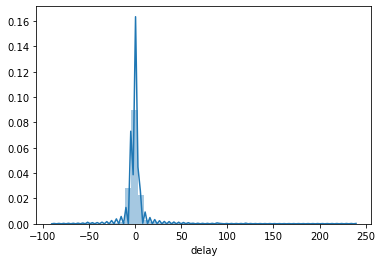

In [35]:
sns.distplot(y_train)

### Distribution of target column
#### Outliers are present but not significant
#### Positive skewwed graph

### Univariate analysis

In [36]:
x_train.nunique()

business_code                 5
cust_number                1246
name_customer              3455
clear_date                  286
buisness_year                 1
doc_id                    29337
posting_date                305
document_create_date        311
document_create_date.1      305
due_in_date                 357
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         26844
baseline_create_date        315
cust_payment_terms           67
invoice_id                29337
isOpen                        1
dtype: int64

In [37]:
x_train.invoice_currency.value_counts()

USD    27074
CAD     2263
Name: invoice_currency, dtype: int64

In [38]:
clear_month = train_data.clear_date.dt.month

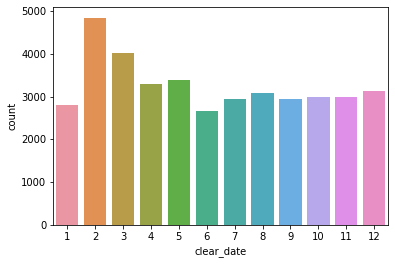

In [39]:
sns.countplot(x=clear_month)

###### February is the month where companies completed most transaction

In [40]:
temp = x_train.merge(y_train,on = x_train.index)

In [41]:
temp.loc[temp['delay']<0,'DaysLate_Code'] = 'Early'
temp.loc[temp['delay']==0,'DaysLate_Code'] = 'On time'
temp.loc[temp['delay']>0,'DaysLate_Code'] = 'Late'

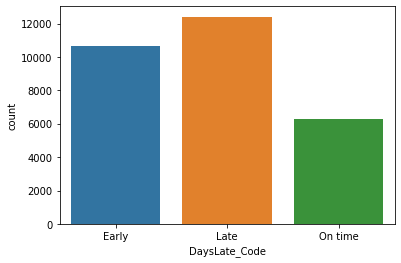

In [42]:
sns.countplot(x = temp['DaysLate_Code'])

###### we clearly see that late payement and early paymment are more than on time payment

In [43]:
x_train.nunique()

business_code                 5
cust_number                1246
name_customer              3455
clear_date                  286
buisness_year                 1
doc_id                    29337
posting_date                305
document_create_date        311
document_create_date.1      305
due_in_date                 357
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         26844
baseline_create_date        315
cust_payment_terms           67
invoice_id                29337
isOpen                        1
dtype: int64

## Multivariate analysis

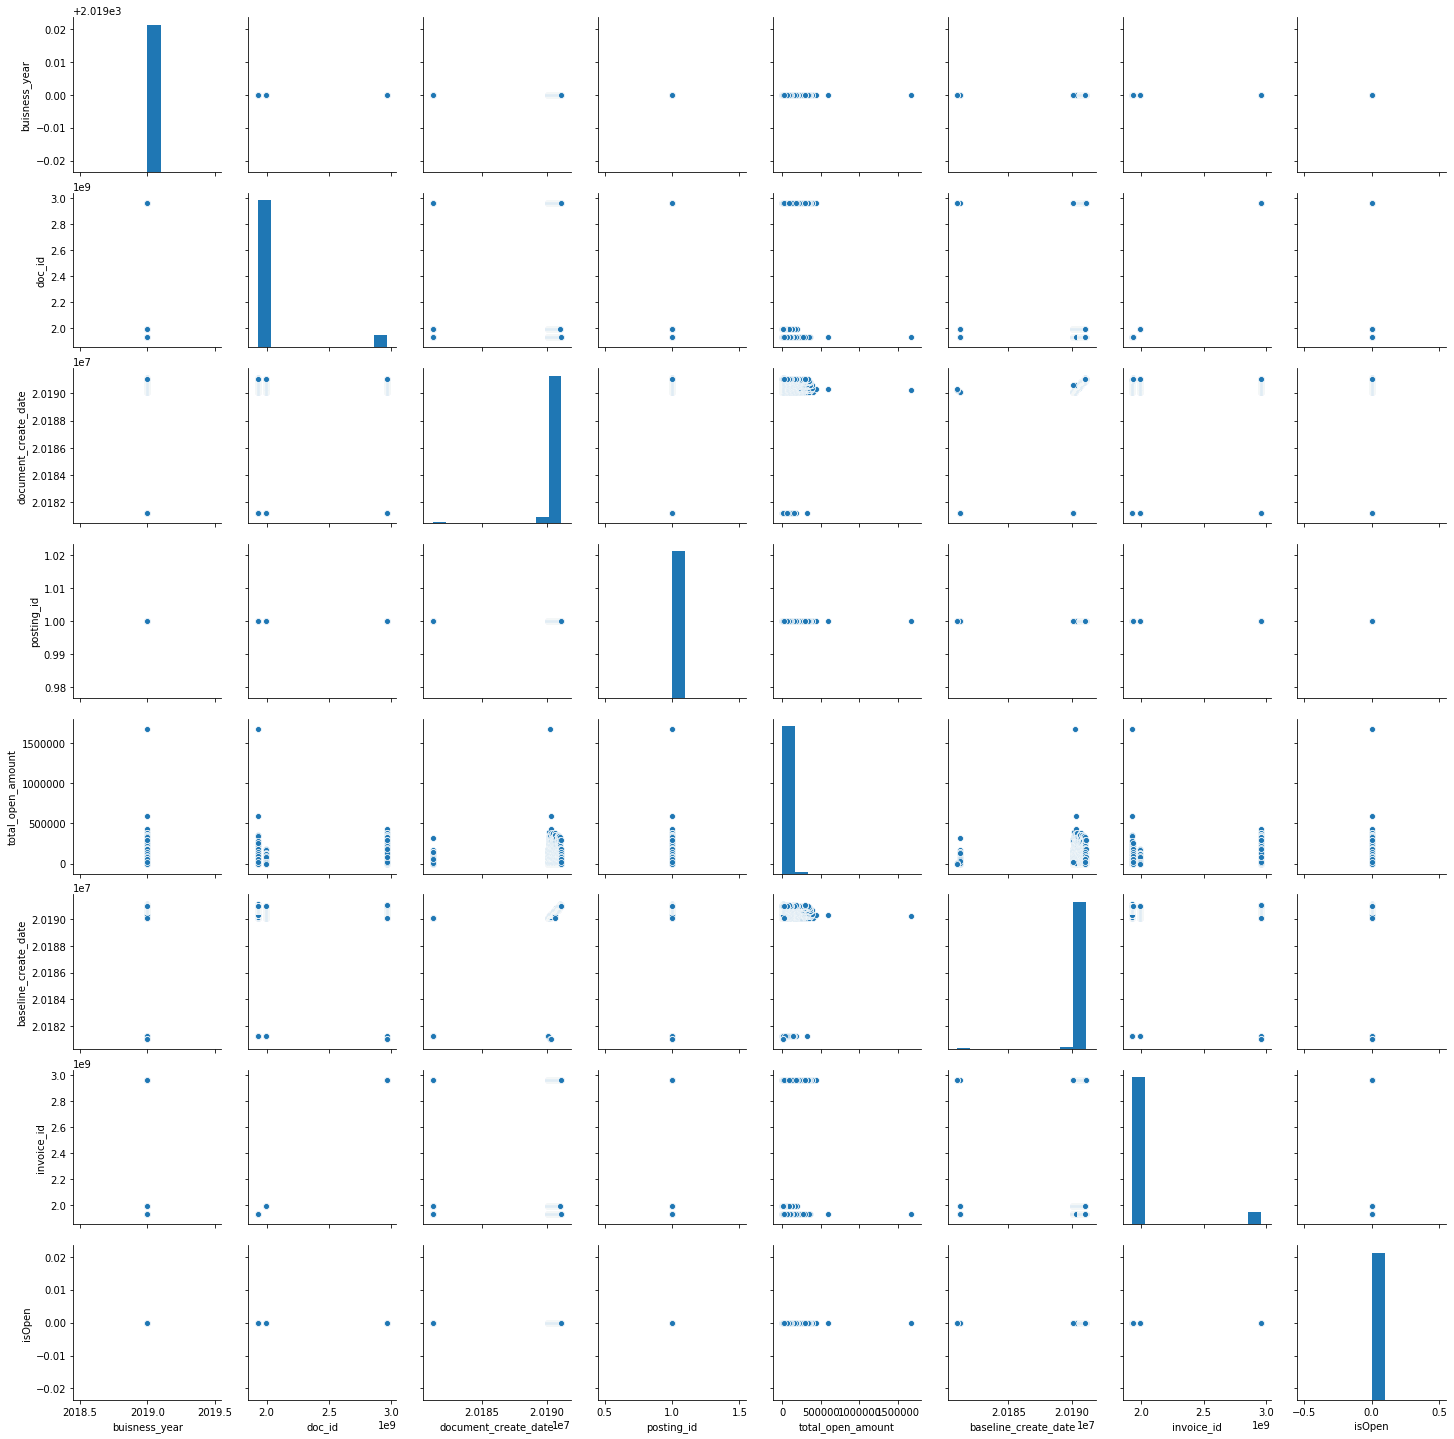

In [44]:
sns.pairplot(x_train)

#### Here we se that business_year posting_id and isopen has only one value so we will drop it later

### Bivariate analysis

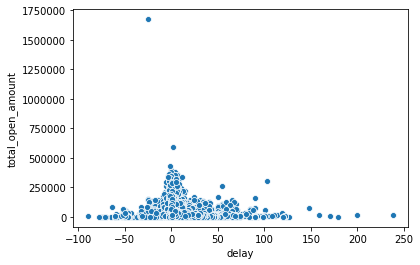

In [45]:
sns.scatterplot(y_train,x_train['total_open_amount'])

In [46]:
### There are some outliers but can be neglected

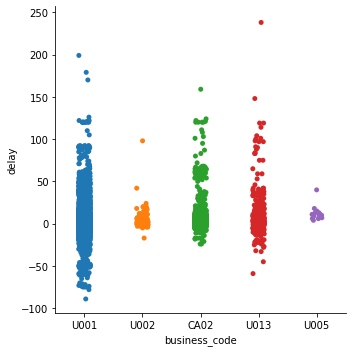

In [47]:
sns.catplot(data=x_train.merge(y_train,on = x_train.index), x="business_code", y="delay")

###### We see that before time payment varies in all buisness code so we can use as feature

## Feature Engineering

In [48]:
#We will remove the column that are not necessary for model
# reomve from train as well as validation and test set also

In [49]:
x_train.drop(columns=['buisness_year', 'document type', 'posting_id', 'isOpen','document_create_date'], inplace=True)

In [50]:
x_val.drop(columns=['buisness_year', 'document type', 'posting_id', 'isOpen','document_create_date'], inplace=True)
x_test.drop(columns=['buisness_year', 'document type', 'posting_id', 'isOpen','document_create_date'], inplace=True)

In [51]:
#Now we will do labelencoding for some feature
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(x_train['business_code'])
x_train['business_enc'] = encoder.transform(x_train['business_code'])

In [52]:
x_train

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,business_enc
17783,U001,0200769623,WAL-MAR associates,2019-01-09,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,USD,10281.44,20181230.0,NAH4,1.928539e+09,1
16307,U001,0200769623,WAL-MAR corp,2019-01-15,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,18703.02,20181230.0,NAH4,1.928540e+09,1
48752,U001,0200418007,AM trust,2019-01-15,1.928529e+09,2018-12-30,2018-12-30,2019-01-14,USD,49711.27,20181230.0,NAA8,1.928529e+09,1
23751,U002,0200816950,COLOM trust,2019-01-30,1.990563e+09,2018-12-30,2018-12-30,2019-01-29,USD,64473.79,20181230.0,NA38,1.990563e+09,2
1116,U001,CCU013,KRAFT F corporation,2019-03-01,1.928517e+09,2018-12-30,2018-12-30,2018-12-30,USD,607.07,20181230.0,NAX2,1.928517e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36748,U001,0200847305,CUSTOM co,2019-11-13,1.930057e+09,2019-10-30,2019-10-30,2019-11-09,USD,54211.50,20191030.0,NA10,1.930057e+09,1
16632,U001,0200769623,WAL-MAR trust,2019-11-12,1.930072e+09,2019-10-30,2019-10-30,2019-11-14,USD,1084.22,20191030.0,NAH4,1.930072e+09,1
32758,U001,0200781803,JRD in,2019-11-19,1.930073e+09,2019-10-30,2019-10-30,2019-11-19,USD,137.24,20191030.0,NAD1,1.930073e+09,1
17301,U001,0200780383,MEIJ corporation,2019-11-15,1.930067e+09,2019-10-30,2019-10-30,2019-11-14,USD,1373.96,20191030.0,NAA8,1.930067e+09,1


In [53]:
#Performing above encoding on validation and testset
x_val['business_enc'] = encoder.transform(x_val['business_code'])
x_test['business_enc'] = encoder.transform(x_test['business_code'])

In [54]:
#Now dropping feature that are unnecessary
x_train.drop('business_code',axis=1,inplace=True)
x_val.drop('business_code',axis=1,inplace=True)
x_test.drop('business_code',axis=1,inplace=True)

In [55]:
#Extraxting number from customer number
x_train['customer_num']= x_train['cust_number'].str.extract('(\d+)')

In [56]:
x_test['customer_num']= x_test['cust_number'].str.extract('(\d+)')
x_val['customer_num']= x_val['cust_number'].str.extract('(\d+)')

In [57]:
#deleting customer nuber column We can also drop name of customer
x_train.drop(columns=['cust_number','name_customer'],axis=1,inplace=True)
x_val.drop(columns=['cust_number','name_customer'],axis=1,inplace=True)
x_test.drop(columns=['cust_number','name_customer'],axis=1,inplace=True)

In [58]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4890 entries, 37143 to 30288
Data columns (total 12 columns):
clear_date                4890 non-null datetime64[ns]
doc_id                    4890 non-null float64
posting_date              4890 non-null datetime64[ns]
document_create_date.1    4890 non-null datetime64[ns]
due_in_date               4890 non-null datetime64[ns]
invoice_currency          4890 non-null object
total_open_amount         4890 non-null float64
baseline_create_date      4890 non-null float64
cust_payment_terms        4890 non-null object
invoice_id                4890 non-null float64
business_enc              4890 non-null int32
customer_num              4890 non-null object
dtypes: datetime64[ns](4), float64(4), int32(1), object(3)
memory usage: 477.5+ KB


In [59]:
#As we have two currency we can convert it into 1 by exchage rate 
#Taking average exachange rate as 0.8 from cad to usd in 2019
x_train['invoice_currency'] = x_train['invoice_currency'].str.replace('CAD', "0.8")
x_train['invoice_currency'] = x_train['invoice_currency'].str.replace('USD', "1")
x_val['invoice_currency'] = x_val['invoice_currency'].str.replace('CAD', "0.8")
x_val['invoice_currency'] = x_val['invoice_currency'].str.replace('USD', "1")
x_test['invoice_currency'] = x_test['invoice_currency'].str.replace('CAD', "0.8")
x_test['invoice_currency'] = x_test['invoice_currency'].str.replace('USD', "1")


In [60]:
x_train['invoice_currency'] = x_train['invoice_currency'].astype(float)
x_val['invoice_currency'] = x_val['invoice_currency'].astype(float)
x_test['invoice_currency'] = x_test['invoice_currency'].astype(float)

In [61]:
x_train['customer_num'] = x_train['customer_num'].astype(int)
x_val['customer_num'] = x_val['customer_num'].astype(int)
x_test['customer_num'] = x_test['customer_num'].astype(int)

In [62]:
#Converting the currency
x_train['total_amt_nom'] = x_train['invoice_currency']*x_train['total_open_amount']
x_val['total_amt_nom'] = x_val['invoice_currency']*x_val['total_open_amount']
x_test['total_amt_nom'] = x_test['invoice_currency']*x_test['total_open_amount']

In [63]:
#extracting datetime into month and days
x_train["doc_create_day"] = x_train["document_create_date.1"].dt.day
x_train["doc_create_month"] =x_train["document_create_date.1"].dt.month
x_val["doc_create_day"] = x_val["document_create_date.1"].dt.day
x_val["doc_create_month"] =x_val["document_create_date.1"].dt.month
x_test["doc_create_day"] = x_test["document_create_date.1"].dt.day
x_test["doc_create_month"] =x_test["document_create_date.1"].dt.month


In [64]:
x_train["due_day"] = x_train["due_in_date"].dt.day
x_train["due_month"] =x_train["due_in_date"].dt.month
x_val["due_day"] = x_val["due_in_date"].dt.day
x_val["due_month"] =x_val["due_in_date"].dt.month
x_test["due_day"] = x_test["due_in_date"].dt.day
x_test["due_month"] =x_test["due_in_date"].dt.month

In [65]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29337 entries, 17783 to 36000
Data columns (total 17 columns):
clear_date                29337 non-null datetime64[ns]
doc_id                    29337 non-null float64
posting_date              29337 non-null datetime64[ns]
document_create_date.1    29337 non-null datetime64[ns]
due_in_date               29337 non-null datetime64[ns]
invoice_currency          29337 non-null float64
total_open_amount         29337 non-null float64
baseline_create_date      29337 non-null float64
cust_payment_terms        29337 non-null object
invoice_id                29337 non-null float64
business_enc              29337 non-null int32
customer_num              29337 non-null int32
total_amt_nom             29337 non-null float64
doc_create_day            29337 non-null int64
doc_create_month          29337 non-null int64
due_day                   29337 non-null int64
due_month                 29337 non-null int64
dtypes: datetime64[ns](4), float64(6), 

In [66]:
#final drop of unwanted column
x_train.drop(columns=['clear_date', 'posting_date','document_create_date.1' ,'invoice_currency','due_in_date','cust_payment_terms'],axis=1, inplace=True)

In [67]:
x_val.drop(columns=['clear_date', 'posting_date','document_create_date.1' ,'invoice_currency','due_in_date','cust_payment_terms'],axis=1, inplace=True)
x_test.drop(columns=['clear_date', 'posting_date','document_create_date.1' ,'invoice_currency','due_in_date','cust_payment_terms'],axis=1, inplace=True)

In [68]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29337 entries, 17783 to 36000
Data columns (total 11 columns):
doc_id                  29337 non-null float64
total_open_amount       29337 non-null float64
baseline_create_date    29337 non-null float64
invoice_id              29337 non-null float64
business_enc            29337 non-null int32
customer_num            29337 non-null int32
total_amt_nom           29337 non-null float64
doc_create_day          29337 non-null int64
doc_create_month        29337 non-null int64
due_day                 29337 non-null int64
due_month               29337 non-null int64
dtypes: float64(5), int32(2), int64(4)
memory usage: 3.7 MB


## Feature Selection

### Filter method using correlation function

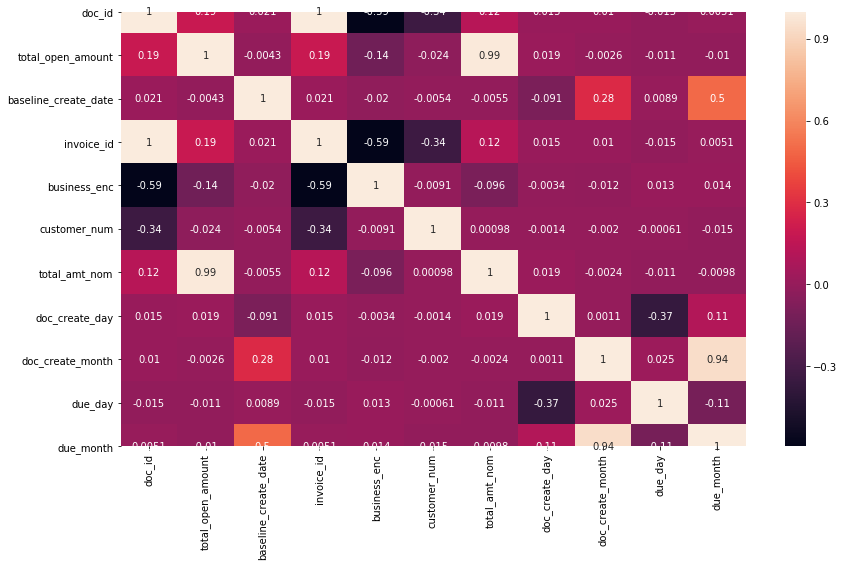

In [69]:
corr=x_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

In [70]:
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [71]:
handling_correlation(x_train.copy(),0.85)

['total_amt_nom', 'invoice_id', 'due_month']

In [72]:
x_train.drop(columns=['invoice_id','total_open_amount'],axis=1, inplace=True)

In [73]:
x_test.drop(columns=['invoice_id','total_open_amount'],axis=1, inplace=True)
x_val.drop(columns=['invoice_id','total_open_amount'],axis=1, inplace=True)

### Embedded method

In [74]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

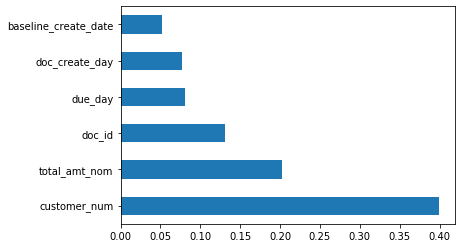

In [75]:
feature_importance=tree_based_feature_importance(x_train,y_train)

In [76]:
display(feature_importance)

,Features,Importances
3,customer_num,0.399899
4,total_amt_nom,0.202094
0,doc_id,0.131531
7,due_day,0.080412
5,doc_create_day,0.077446
1,baseline_create_date,0.051504
8,due_month,0.034378
6,doc_create_month,0.017663
2,business_enc,0.005073


In [77]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29337 entries, 17783 to 36000
Data columns (total 9 columns):
doc_id                  29337 non-null float64
baseline_create_date    29337 non-null float64
business_enc            29337 non-null int32
customer_num            29337 non-null int32
total_amt_nom           29337 non-null float64
doc_create_day          29337 non-null int64
doc_create_month        29337 non-null int64
due_day                 29337 non-null int64
due_month               29337 non-null int64
dtypes: float64(3), int32(2), int64(4)
memory usage: 3.3 MB


# Modelling

### Since it is regression based model we will use
#### LinearRegressor
#### RandomForestRegeresor


In [78]:
#Using linear regression model and checkking the parameter
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
#predicting the value of validation set
y_predict = base_model.predict(x_val)

In [80]:
#checking root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_val, y_predict))
print(rmse)

14.06749141783372


In [81]:
#predicting value for test set
y_test_predict = base_model.predict(x_test)

In [82]:
#Erooor for test set
rmse_test = sqrt(mean_squared_error(y_test, y_test_predict))
print(rmse_test)

33.606780934556504


In [83]:
#Model accuracy score
base_model.score(x_test,y_test)* 100

-830.2458537185522

In [84]:
#Creting randomForest model
from sklearn.ensemble import RandomForestRegressor
fregress = RandomForestRegressor()
fregress.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [85]:
#predicting the value of validation set
y_predict2 = fregress.predict(x_val)

In [86]:
rmse2 = sqrt(mean_squared_error(y_val, y_predict2))
print(rmse2)

9.501859201650667


In [87]:
y_test_predict2 = fregress.predict(x_test)

In [88]:
rmse_test2 = sqrt(mean_squared_error(y_test, y_test_predict2))
print(rmse_test2)

10.335675603657899


In [89]:
fregress.score(x_test,y_test) *100

12.012363289584394

## Doing some hyperparameter tuning

In [90]:

hregress = RandomForestRegressor(max_depth=4, random_state=0)
hregress.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [91]:
y_predict3 = hregress.predict(x_val)

In [92]:
rmse3 = sqrt(mean_squared_error(y_val, y_predict3))
print(rmse3)

5.704487925020202


In [93]:
y_test_predict3 = hregress.predict(x_test)

In [94]:
rmse_test3 = sqrt(mean_squared_error(y_test, y_test_predict3))
print(rmse_test3)

8.40830537445794


In [95]:
hregress.score(x_test,y_test) *100

41.768112806088396

## Now we will work on the test_data part and generate the payment date

In [96]:
test_data = test.copy()

In [97]:
#workin on test set to make model tto be predicted
test_data['customer_num']= test_data['cust_number'].str.extract('(\d+)')
test_data['customer_num'] = test_data['customer_num'].astype(int)

In [98]:
#dropping the unwanted column
test_data.drop(columns=['buisness_year', 'document type', 'posting_id', 'isOpen','document_create_date','area_business','cust_number','name_customer'], inplace=True)

In [99]:
encoder.fit(test_data['business_code'])
test_data['business_enc'] = encoder.transform(test_data['business_code'])

In [100]:
#Now dropping buisness_code and invoice id
test_data.drop(columns=['business_code','invoice_id'], inplace=True)

In [101]:
test_data.dropna(axis = 1, inplace= True)

In [102]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49989
Data columns (total 10 columns):
doc_id                    10000 non-null float64
posting_date              10000 non-null object
document_create_date.1    10000 non-null int64
due_in_date               10000 non-null float64
invoice_currency          10000 non-null object
total_open_amount         10000 non-null float64
baseline_create_date      10000 non-null float64
cust_payment_terms        10000 non-null object
customer_num              10000 non-null int32
business_enc              10000 non-null int32
dtypes: float64(4), int32(2), int64(1), object(3)
memory usage: 781.2+ KB


In [103]:
test_data['invoice_currency'] = test_data['invoice_currency'].str.replace('CAD', "0.8")
test_data['invoice_currency'] = test_data['invoice_currency'].str.replace('USD', "1")

In [104]:
test_data['invoice_currency'] = test_data['invoice_currency'].astype(float)

In [105]:
test_data['total_amt_nom'] = test_data['invoice_currency']* test_data['total_open_amount']

In [106]:
test_data['document_create_date.1'] = pd.to_datetime(test_data['document_create_date.1'], format ='%Y%m%d')
test_data['due_in_date'] = pd.to_datetime(test_data['due_in_date'],format='%Y%m%d')

In [107]:
test_data["doc_create_day"] = test_data["document_create_date.1"].dt.day
test_data["doc_create_month"] = test_data["document_create_date.1"].dt.month
test_data["due_day"] = test_data["due_in_date"].dt.day
test_data["due_month"] =test_data["due_in_date"].dt.month


In [108]:
test_data.drop(columns=['posting_date','document_create_date.1','due_in_date','invoice_currency','total_open_amount',], axis=1, inplace=True)

In [109]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49989
Data columns (total 10 columns):
doc_id                  10000 non-null float64
baseline_create_date    10000 non-null float64
cust_payment_terms      10000 non-null object
customer_num            10000 non-null int32
business_enc            10000 non-null int32
total_amt_nom           10000 non-null float64
doc_create_day          10000 non-null int64
doc_create_month        10000 non-null int64
due_day                 10000 non-null int64
due_month               10000 non-null int64
dtypes: float64(3), int32(2), int64(4), object(1)
memory usage: 781.2+ KB


In [110]:
test_data.drop('cust_payment_terms',axis = 1, inplace = True)

In [111]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49989
Data columns (total 9 columns):
doc_id                  10000 non-null float64
baseline_create_date    10000 non-null float64
customer_num            10000 non-null int32
business_enc            10000 non-null int32
total_amt_nom           10000 non-null float64
doc_create_day          10000 non-null int64
doc_create_month        10000 non-null int64
due_day                 10000 non-null int64
due_month               10000 non-null int64
dtypes: float64(3), int32(2), int64(4)
memory usage: 703.1 KB


In [112]:
#Now data is ready so that value can be predicted

In [113]:
#hregress is best model so owe will use that 
predicted = hregress.predict(test_data)

In [114]:
predicted=np.around(predicted)
predicted.astype(int)

array([15, 14, 14, ...,  2, 14, 15])

In [115]:
#creating new dataframe
result = pd.DataFrame()

In [116]:
delay = []
for x in predicted:
    delay.append(pd.Timedelta(days=x))
result['delay'] = delay
result

,delay
0,15 days
1,14 days
2,14 days
3,2 days
4,3 days
...,...
9995,15 days
9996,14 days
9997,2 days
9998,14 days


##### Predicting the clear date

In [117]:
test['due_in_date'] = pd.to_datetime(test['due_in_date'], format='%Y%m%d')

In [118]:
result['clear_date'] = test['due_in_date'] + result['delay']

In [121]:
#add time delta to datetime it will give payment date

In [122]:
bucket = []
for x in predicted:
    if x<=15:
        bucket.append("0-15days")
    elif x<=30:
        bucket.append("16-30days")
    elif x<=45:
        bucket.append("31-45days")
    elif x<=60:
        bucket.append("46-60days")
    else:
        bucket.append("Greater than 60 days")
result['bucket']= bucket
result.drop(['delay'],axis=1,inplace=True)
result

,clear_date,bucket
0,NaT,0-15days
1,NaT,0-15days
2,NaT,0-15days
3,2020-04-19,0-15days
4,NaT,0-15days
...,...,...
9995,NaT,0-15days
9996,NaT,0-15days
9997,NaT,0-15days
9998,NaT,0-15days


# END!!!

In [125]:
#there are some error i will debug it in unpcoming days